<a href="https://colab.research.google.com/github/Jayalakshmibadiginchala/Student-Performance-Prediction/blob/main/Student_performance_preduction_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder

# Setting visualization style
sns.set(style="whitegrid")

In [ ]:
df_original = pd.read_csv("/content/StudentPerformanceFactors (1).csv")
df_original.head()
df_original.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
# Checking for missing values
print("Missing values in each column:\n")
df_original.isnull().sum()

Missing values in each column:



,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df = df_original.copy()
columns_to_remove = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
df.drop(columns=columns_to_remove, inplace=True)

In [ ]:
# Descriptive statistics
print("\nDescriptive statistics:\n", )
df.describe()


Descriptive statistics:



,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


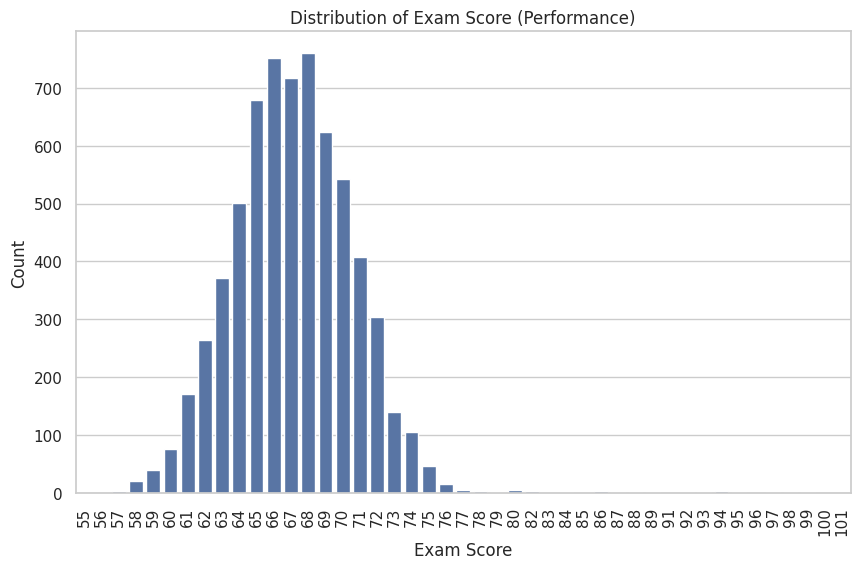

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Exam_Score', data=df, width=0.8)  # Adjusting the width to increase spacing
plt.title('Distribution of Exam Score (Performance)')
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Set x-ticks to vertical
plt.show()

In [ ]:
# Encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
# Display the first few rows of the dataset
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,1,2,3,0,1,67
1,19,64,1,2,0,8,59,1,1,2,2,1,0,4,0,0,61
2,24,98,2,2,1,7,91,2,1,2,2,1,1,4,0,1,74
3,29,89,1,2,1,8,98,2,1,1,2,1,0,4,0,1,71
4,19,92,2,2,1,6,65,2,1,3,2,1,1,4,0,0,70


In [ ]:
# Splitting the dataset into features and target
y = (df['Exam_Score'] > 65).astype(int)  # Set to 1 for scores above 65, 0 otherwise
X = df.drop('Exam_Score', axis=1)       # Drop the Exam_Score column from features
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Training a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoding categorical variables *after* splitting the data
label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns: # using X_train here!
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column]) # fitting and transforming X_train
    X_test[column] = le.transform(X_test[column]) # only transforming X_test
    label_encoders[column] = le

# Training a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Evaluating the model
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.90

Confusion Matrix:

[[342  81]
 [ 53 846]]


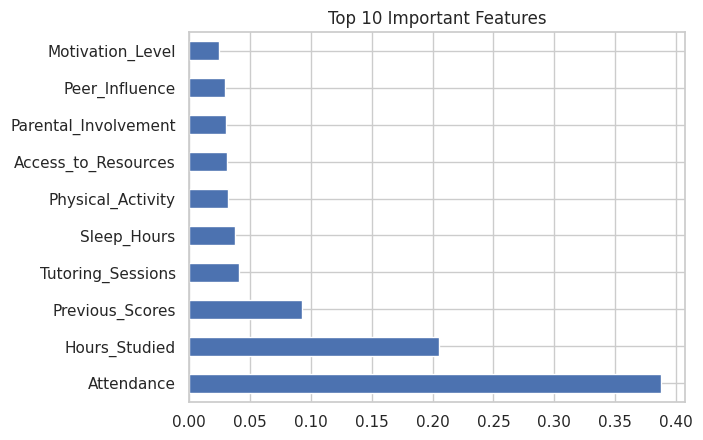

In [ ]:
# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()

Accuracy: 0.89

Confusion Matrix:

[[337  86]
 [ 57 842]]


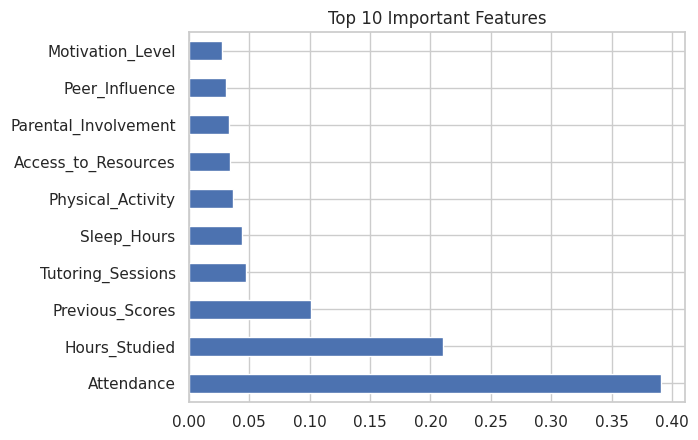

In [ ]:
df = df_original.copy()

# Remove the variables
columns_to_remove += ['Family_Income', 'Learning_Disabilities', 'Gender']
df.drop(columns=columns_to_remove, inplace=True)

# Encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Splitting the dataset into features and target
y = (df['Exam_Score'] > 65).astype(int)  # Set to 1 for scores above 65, 0 otherwise
X = df.drop('Exam_Score', axis=1)       # Drop the Exam_Score column from features

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Evaluating the model
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()